In [2]:
import pandas as pd
import requests
import acquire, prep
import matplotlib.pyplot as plt
import seaborn as sns

from vega_datasets import data


In [3]:
df = acquire.combine_all()
df.head(1)

,sale_amount,sale_date,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [4]:
df = prep.make_datetime(df)

In [5]:
df = prep.set_index(df)
df.head(1)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


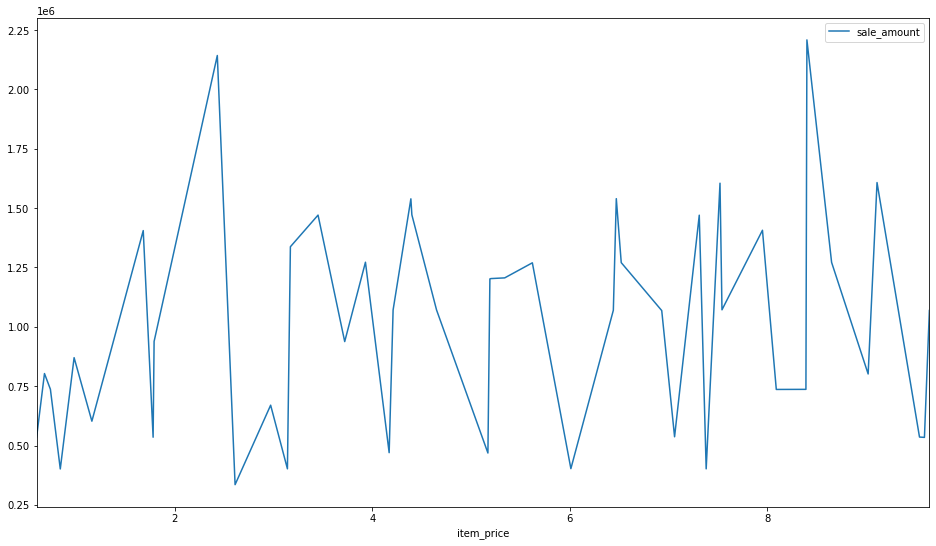

In [43]:
plt.rc('figure', figsize=(16,9))
# sns.scatterplot(df.sale_amount,df.item_price)

by_date = df.groupby(['item_price'])['sale_amount']\
            .sum().reset_index()
by_date.plot(x='item_price', y='sale_amount')

In [6]:
# df.set_index('sale_date', inplace=True)

In [47]:
df['day_of_week'] = df.index.day_name()
df['month'] = df.index.month

In [48]:
df['sales_total'] = df.sale_amount * df.item_price

In [49]:
df.head(1)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,day_of_week,month,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Tuesday,1,10.92


In [10]:
day_sales = pd.DataFrame(df.sales_total.resample('D').sum())
day_sales['diff'] = day_sales.sales_total.diff(1)
day_sales

,sales_total,diff
sale_date,,
2013-01-01 00:00:00+00:00,73844.01,NaN
2013-01-02 00:00:00+00:00,73570.58,-273.43
2013-01-03 00:00:00+00:00,78169.48,4598.90
2013-01-04 00:00:00+00:00,84467.73,6298.25
2013-01-05 00:00:00+00:00,87621.85,3154.12
...,...,...
2017-12-27 00:00:00+00:00,109151.15,-2850.06
2017-12-28 00:00:00+00:00,117377.49,8226.34
2017-12-29 00:00:00+00:00,126541.84,9164.35


### Power data

In [11]:
df = acquire.get_power_data()
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [12]:
df.Date = pd.to_datetime(df.Date)

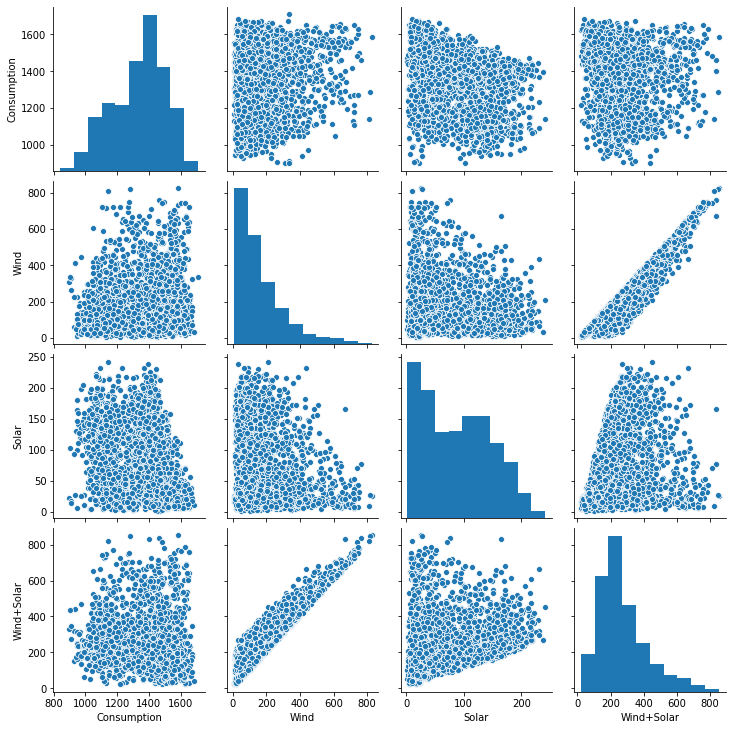

In [13]:
sns.pairplot(df)

In [14]:
df.set_index('Date', inplace=True)
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [15]:
df['year'] = df.index.year
df['month'] = df.index.month

In [16]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,year,month
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1
2006-01-02,1380.521,NaN,NaN,NaN,2006,1
2006-01-03,1442.533,NaN,NaN,NaN,2006,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1
2006-01-05,1477.131,NaN,NaN,NaN,2006,1


In [50]:
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [51]:
df.date = pd.to_datetime(df.date)
df.set_index('date', inplace=True)
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


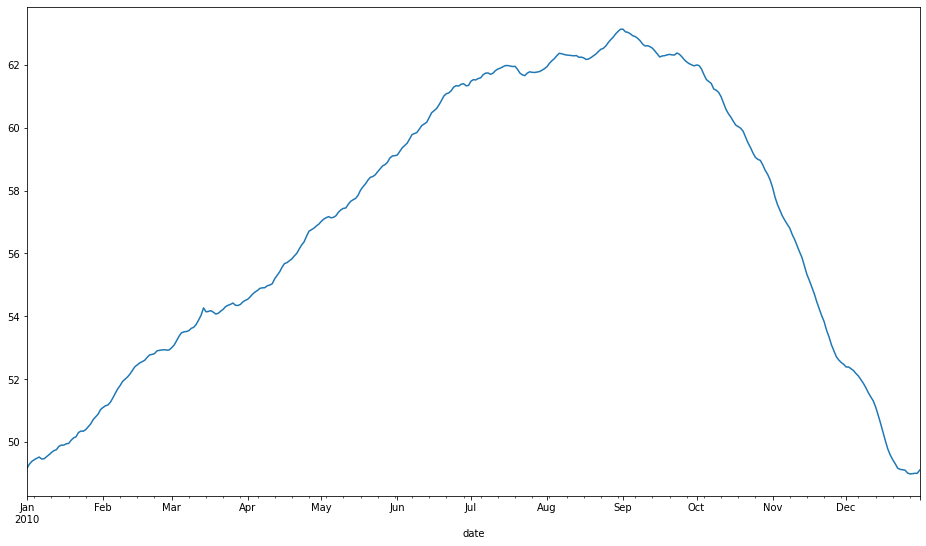

In [19]:
df.temp.resample('D').mean().plot()

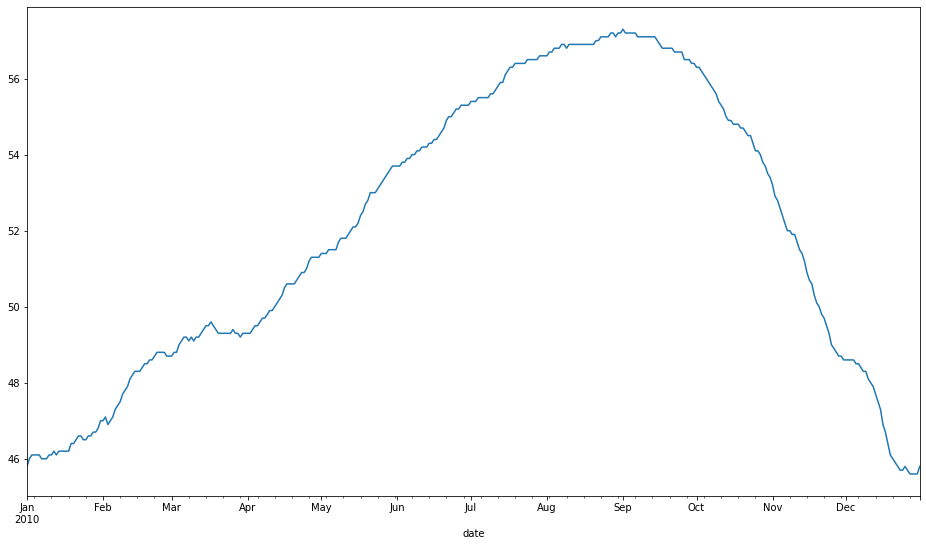

In [20]:
df.temp.resample('D').min().plot()

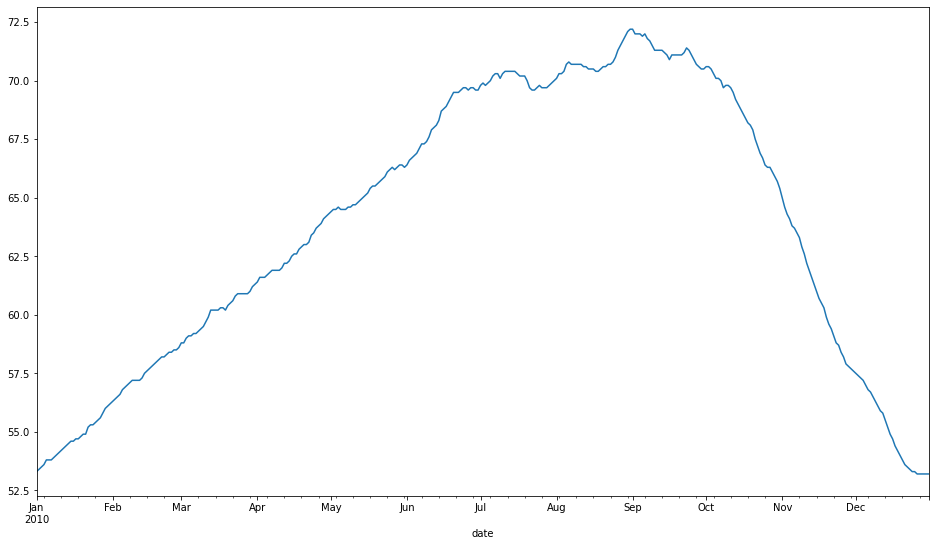

In [21]:
df.temp.resample('D').max().plot()

In [53]:
df.temp.resample('M').mean().nsmallest(1)

date
2010-01-31    49.98414
Freq: M, Name: temp, dtype: float64

In [54]:
df.temp.resample('M').mean().nlargest(1)

date
2010-09-30    62.487083
Freq: M, Name: temp, dtype: float64

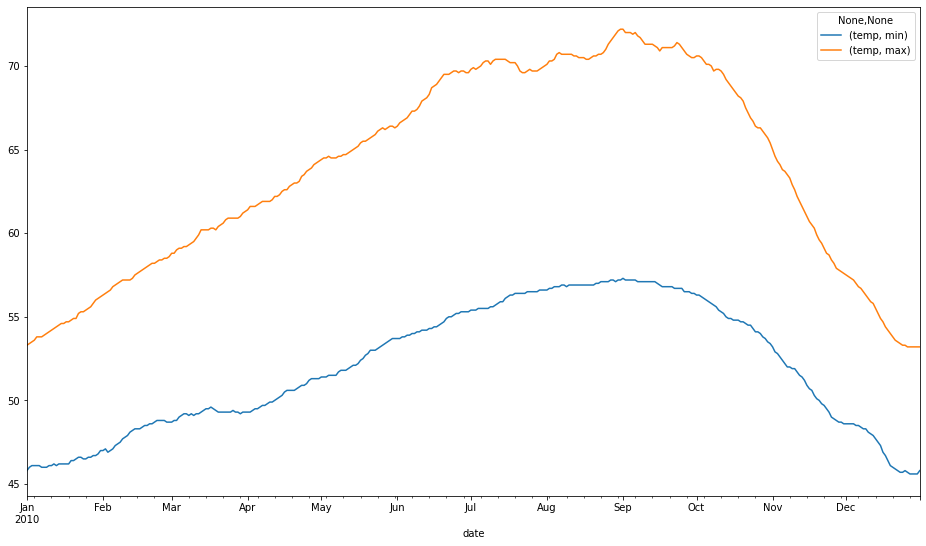

In [24]:
df.resample('D').aggregate(['min','max']).plot()

In [25]:
df_minmax = df.resample('D').aggregate(['min','max'])
df_minmax['diff'] = df_minmax[('temp', 'max')] - \
                    df_minmax[('temp', 'min')]
df_minmax[('diff', '')].resample('M').sum().nlargest(1)

date
2010-07-31    433.3
Freq: M, Name: (diff, ), dtype: float64

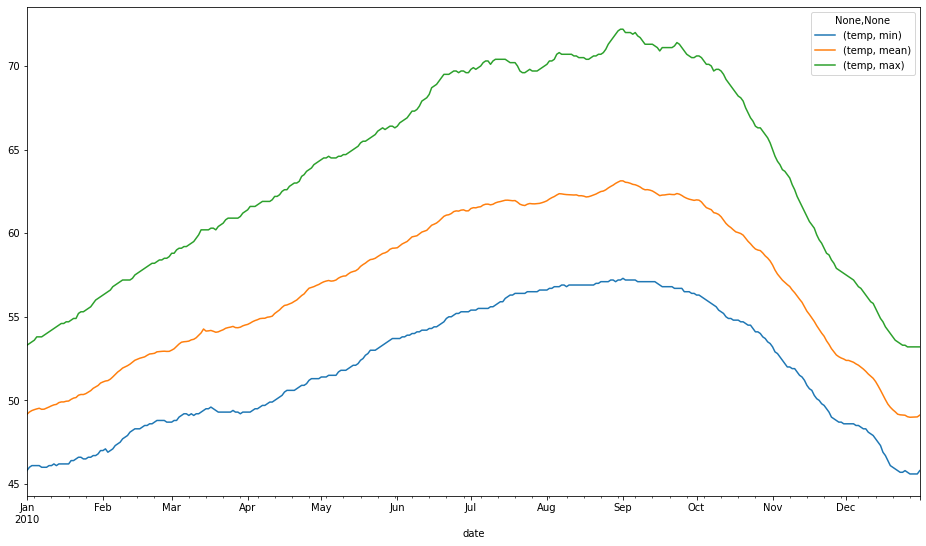

In [26]:
df.resample('D').aggregate(['min','mean','max']).plot()

## Flights 20k data

In [27]:
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [28]:
df.delay[df.delay < 0] = 0
df.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND


In [29]:
df.set_index('date', inplace=True)

In [30]:
df = df.sort_index()
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [31]:
df.shape

(20000, 4)

In [32]:
df['hour'] = df.index.hour
df['day'] = df.index.dayofweek
df['month'] = df.index.month

In [33]:
df.head()

,delay,distance,origin,destination,hour,day,month
date,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,0,1
2001-01-01 06:20:00,0,491,BNA,MCI,6,0,1
2001-01-01 06:30:00,0,251,MDW,STL,6,0,1
2001-01-01 07:00:00,0,361,OAK,ONT,7,0,1
2001-01-01 07:00:00,0,303,MSY,HOU,7,0,1


In [34]:
df.groupby('hour').delay.mean().nlargest(1)

hour
3    302.5
Name: delay, dtype: float64

In [35]:
df.groupby('day').delay.mean()

day
0     7.165772
1     9.410866
2    11.032478
3    12.821322
4    17.757596
5     8.431498
6    10.413542
Name: delay, dtype: float64

Friday has a much higher delay than other days, and Monday has a lower delay

In [36]:
df.groupby('month').delay.mean()

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64

March seems to have lower delays than other months